# Table of Contents
1. [Urea and Corn Only](#Start-small-urea-and-corn-only)
2. [Corn and Urea but Get Rid of Slope & m1x1](#Now-do-the-Same-Thing-as-Above-Except-don't-need-columns:-slope-or-m1x1)
3. [Corn and Urea Interactive](#Now-Let's-Try-to-Make-it-Interactive)
4. [More Variables Interactive](#Now-Let's-Try-More-Variables-and-Have-it-Interactive)
5. [3 Variables Not Interactive](#Let's-Just-use-3-Different-Variables:-Corn,-Crude,-Coal)
6. [Coal, Crude ,Coal Variables Interactive](#Corn,-Crude,-coal-variables-that-are-interactive)
7. [Choose from 3 Variables Interactive](#choose-from-3-variables-interactive)
8. [Other Volatility Things That May Be Useful (Interactive)](#Other-Volatility-Things-That-May-Be-Useful,-interactive)

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels import regression
import numpy as np
import itertools

## Start Small Urea and Corn only
[Top](#table-of-contents)

In [7]:
data1 = pd.read_csv("C:/Users/msteinme/Documents/ureacorn.csv")
data1 = data1[['Date','Urea','Corn']][0:78]
data1.tail()

,Date,Urea,Corn
73,5/27/2016,189.0,414.25
74,6/3/2016,180.0,419.75
75,6/10/2016,182.0,427.50
76,6/17/2016,185.0,442.75
77,6/24/2016,182.0,389.00


In [8]:
df = pd.DataFrame(data1)
sLength = len(df)
df['Slope_Corn'] = 0.0

for i in range(0,len(df)):
    start = i
    end = start + 21
    X = df[['Corn']][start:end]
    Y = df[['Urea']][start:end]
    
    est= sm.OLS(Y,X).fit()
    
    value = str(est.params)
    value = value.split(' ')
    value = value[4].splitlines()    
    value =  value[0]
    
      
    df.set_value(end-1,'Slope_Corn',value)
    
    if end == len(df):
        break

In [9]:
df.tail()

,Date,Urea,Corn,Slope_Corn
73,5/27/2016,189.0,414.25,0.626193
74,6/3/2016,180.0,419.75,0.615447
75,6/10/2016,182.0,427.50,0.604313
76,6/17/2016,185.0,442.75,0.595474
77,6/24/2016,182.0,389.00,0.592211


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
date = df['Date']
print(df.dtypes)
df.index = df['Date'].values
df = df.drop(['Date'],axis=1)

#slope * variable
m1x1 = (df['Slope_Corn'][20:]) * (df['Corn'][20:])
df['m1x1'] = m1x1

#volatility
v1 = (df['Urea'][20:]) - (df['m1x1'][20:])
df['v1'] = v1

#volatility reduction
ureavol = df['Urea'][20:]
v1vol = df['v1'][20:]
vol_red_1 = (pd.rolling_std(v1vol,window=21))/(pd.rolling_std(ureavol,window=21))
df['vol_red_1'] = 1 - vol_red_1
                  
#adding correlation part
corncorr = df['Corn'][20:] #since want to start at same time as volatility reduction
ureacorr = df['Urea'][20:]
df['corr_corn'] = pd.rolling_corr(corncorr,ureacorr,window=21)

df

Date          datetime64[ns]
Urea                 float64
Corn                 float64
Slope_Corn           float64
dtype: object


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).std()
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21).corr(other=<Series>)


,Urea,Corn,Slope_Corn,m1x1,v1,vol_red_1,corr_corn
2015-01-02,341.0,404.50,0.000000,NaN,NaN,NaN,NaN
2015-01-09,341.0,408.25,0.000000,NaN,NaN,NaN,NaN
2015-01-16,345.0,394.25,0.000000,NaN,NaN,NaN,NaN
2015-01-23,340.0,395.25,0.000000,NaN,NaN,NaN,NaN
2015-01-30,335.0,378.50,0.000000,NaN,NaN,NaN,NaN
2015-02-06,332.0,394.00,0.000000,NaN,NaN,NaN,NaN
2015-02-13,318.0,395.25,0.000000,NaN,NaN,NaN,NaN
2015-02-20,319.0,393.00,0.000000,NaN,NaN,NaN,NaN
2015-02-27,317.0,393.25,0.000000,NaN,NaN,NaN,NaN
2015-03-06,310.0,386.00,0.000000,NaN,NaN,NaN,NaN


## Now do the Same Thing as Above Except don't need columns: slope or m1x1
[Top](#table-of-contents)

In [26]:
data1 = pd.read_csv("C:/Users/msteinme/Documents/ureacorn.csv")
data1 = data1[['Date','Urea','Corn']][0:78]
data1.tail()

,Date,Urea,Corn
73,5/27/2016,189.0,414.25
74,6/3/2016,180.0,419.75
75,6/10/2016,182.0,427.50
76,6/17/2016,185.0,442.75
77,6/24/2016,182.0,389.00


In [27]:
df = pd.DataFrame(data1)
sLength = len(df)
df['Slope'] = 0.0

for i in range(0,len(df)):
    start = i
    end = start + 21
    X = df[['Corn']][start:end]
    Y = df[['Urea']][start:end]
    
    est= sm.OLS(Y,X).fit()
    
    value = str(est.params)
    value = value.split(' ')
    value = value[4].splitlines()    
    value =  value[0]
    
    df.set_value(end-1,'Slope',value)
    
    if end == len(df):
        break

In [28]:
#putting date as index
df['Date'] = pd.to_datetime(df['Date'])
date = df['Date']
df.index = df['Date'].values
df = df.drop(['Date'],axis=1)
#if you want 21 day window need to start at 20 so n-1
#slope * variable
m1x1 = (df['Slope'][20:]) * (df['Corn'][20:])
df['m1x1'] = m1x1

#volatility
v1 = (df['Urea'][20:]) - (df['m1x1'][20:])
df['v1'] = v1

#volatility reduction
ureavol = df['Urea'][20:]
v1vol = df['v1'][20:]
vol_red_1 = (v1vol.rolling(window=21,center=False).std())/(ureavol.rolling(window=21,center=False).std())
df['vol_red_1(%)'] = 100 * (1 - vol_red_1)
                  
#adding correlation part
corncorr = df['Corn'][20:] #since want to start at same time as volatility reduction
ureacorr = df['Urea'][20:]
df['corr_corn(%)'] = 100 * corncorr.rolling(window=21).corr(other=ureacorr)

#dropping slope and m1x1 in shown dataframe
df = df.drop(['Slope'],axis=1)
df = df.drop(['m1x1'],axis=1)

#changing to 2 decimal places
df['v1'] = np.round(df['v1'],decimals=2)
df['vol_red_1(%)'] = np.round(df['vol_red_1(%)'],decimals=2)
df['corr_corn(%)'] = np.round(df['corr_corn(%)'],decimals=2)
df

,Urea,Corn,v1,vol_red_1(%),corr_corn(%)
2015-01-02,341.0,404.50,NaN,NaN,NaN
2015-01-09,341.0,408.25,NaN,NaN,NaN
2015-01-16,345.0,394.25,NaN,NaN,NaN
2015-01-23,340.0,395.25,NaN,NaN,NaN
2015-01-30,335.0,378.50,NaN,NaN,NaN
2015-02-06,332.0,394.00,NaN,NaN,NaN
2015-02-13,318.0,395.25,NaN,NaN,NaN
2015-02-20,319.0,393.00,NaN,NaN,NaN
2015-02-27,317.0,393.25,NaN,NaN,NaN
2015-03-06,310.0,386.00,NaN,NaN,NaN


## Now Let's Try to Make it Interactive
[Top](#table-of-contents)

In [16]:
data1 = pd.read_csv("C:/Users/msteinme/Documents/ureacorn.csv")
data1 = data1[['Date','Urea','Corn']][0:78]

In [17]:
x = input('Enter x variable you are interested in: ')
y = input('Enter y variable you are interested in: ')
windowString = input('Enter window: ')
window = int(windowString)

Enter x variable you are interested in: Corn
Enter y variable you are interested in: Urea
Enter window: 21


In [18]:
df = pd.DataFrame(data1)
sLength = len(df)
df['Slope'] = 0.0

for i in range(0,len(df)):
    start = i
    end = start + window
    X = df[[x]][start:end]
    Y = df[[y]][start:end]
    
    est= sm.OLS(Y,X).fit()
    
    value = str(est.params)
    value = value.split(' ')
    value = value[4].splitlines()    
    value =  value[0]
    
    df.set_value(end-1,'Slope',value)
    
    if end == len(df):
        break

In [19]:
#putting date as index
df['Date'] = pd.to_datetime(df['Date'])
date = df['Date']
df.index = df['Date'].values
df = df.drop(['Date'],axis=1)

#slope * variable
m1x1 = (df['Slope'][(window-1):]) * (df[x][(window-1):])
df['m1x1'] = m1x1

#volatility
v1 = (df[y][(window-1):]) - (df['m1x1'][(window-1):])
df['v1'] = v1

#volatility reduction
ureavol = df[y][(window-1):]
v1vol = df['v1'][(window-1):]
vol_red_1 = (pd.rolling_std(v1vol,window=window))/(pd.rolling_std(ureavol,window=window))
df['vol_red_1(%)'] = 100 * (1 - vol_red_1)
                  
#adding correlation part
xcorr = df[x][(window-1):] #since want to start at same time as volatility reduction
ycorr = df[y][(window-1):]
df['corr_1(%)'] = 100 * pd.rolling_corr(xcorr,ycorr,window=window)

#dropping slope and m1x1 in shown dataframe
df = df.drop(['Slope'],axis=1)
df = df.drop(['m1x1'],axis=1)

#changing to 2 decimal places
df['v1'] = np.round(df['v1'],decimals=2)
df['vol_red_1(%)'] = np.round(df['vol_red_1(%)'],decimals=2)
df['corr_1(%)'] = np.round(df['corr_1(%)'],decimals=2)
df.tail()

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).std()
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21).corr(other=<Series>)


,Urea,Corn,v1,vol_red_1(%),corr_1(%)
2016-05-27,189.0,414.25,-70.40,-22.86,-63.70
2016-06-03,180.0,419.75,-78.33,-24.35,-74.61
2016-06-10,182.0,427.50,-76.34,-25.32,-79.52
2016-06-17,185.0,442.75,-78.65,-28.15,-83.08
2016-06-24,182.0,389.00,-48.37,-24.82,-83.38


## Now Let's Try More Variables and Have it Interactive
[Top](#table-of-contents)

In [20]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
data1 = data[['Date','Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN','Urea']][0:1069]
col_names = list(data1.columns.difference(['Date'])) #don't include list of data

print('Variables to pick from are:', col_names)
#user input
x = input('Enter x variable you are interested in: ')
y = input('Enter y variable you are interested in: ')
windowString = input('Enter window: ')
window = int(windowString)

#finding slope (won't need in final dataframe)
df = pd.DataFrame(data1)
sLength = len(df)
df['Slope'] = 0.0

for i in range(0,len(df)):
    start = i
    end = start + window
    X = df[[x]][start:end]
    Y = df[[y]][start:end]
    
    est= sm.OLS(Y,X).fit()
    
    value = str(est.params)
    value = value.split(' ')
    value = value[4].splitlines()    
    value =  value[0]
    
    df.set_value(end-1,'Slope',value)
    
    if end == len(df):
        break
        
#putting date as index
df['Date'] = pd.to_datetime(df['Date'])
date = df['Date']
df.index = df['Date'].values
df = df.drop(['Date'],axis=1)

#slope * variable (won't need in final dataframe)
m1x1 = (df['Slope'][(window-1):]) * (df[x][(window-1):])
df['m1x1'] = m1x1

#volatility
v1 = (df[y][(window-1):]) - (df['m1x1'][(window-1):])
df['v1'] = v1

#volatility reduction
ureavol = df[y][(window-1):]
v1vol = df['v1'][(window-1):]
vol_red_1 = (pd.rolling_std(v1vol,window=window))/(pd.rolling_std(ureavol,window=window))
df['vol_red_1(%)'] = 100 * (1 - vol_red_1)
                  
#adding correlation part
xcorr = df[x][(window-1):] #since want to start at same time as volatility reduction
ycorr = df[y][(window-1):]
df['corr_1(%)'] = 100 * pd.rolling_corr(xcorr,ycorr,window=window)

#dropping slope and m1x1 in shown dataframe
df = df.drop(['Slope'],axis=1)
df = df.drop(['m1x1'],axis=1)

#changing to 2 decimal places
df['v1'] = np.round(df['v1'],decimals=2)
df['vol_red_1(%)'] = np.round(df['vol_red_1(%)'],decimals=2)
df['corr_1(%)'] = np.round(df['corr_1(%)'],decimals=2)
df.tail()

Variables to pick from are: ['Corn', 'Crude', 'Dollar', 'Gas', 'My_Coal', 'UAN', 'UAN_Inventory', 'Urea', 'Urea_Inventory']
Enter x variable you are interested in: Crude
Enter y variable you are interested in: Urea
Enter window: 21


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).std()
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:58: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21).corr(other=<Series>)


,Dollar,Crude,Corn,Gas,My_Coal,Urea_Inventory,UAN_Inventory,UAN,Urea,v1,vol_red_1(%),corr_1(%)
2016-05-27,95.521,49.74,414.25,2.28,51.35,539602.5479,1044391.0,190.08,189.0,-101.15,-88.29,-20.77
2016-06-03,94.030,49.11,419.75,2.48,54.00,371191.0000,1048312.0,180.16,180.0,-98.06,-84.48,-34.44
2016-06-10,94.570,49.72,427.50,2.62,53.00,371191.0000,1048312.0,169.92,182.0,-90.51,-75.59,-46.85
2016-06-17,94.210,48.56,442.75,2.67,52.55,371191.0000,1048312.0,169.92,185.0,-75.22,-73.52,-59.84
2016-06-24,95.450,48.31,389.00,2.69,52.90,371191.0000,1048312.0,165.12,182.0,-71.72,-70.66,-70.60


## Let's Just use 3 Different Variables: Corn, Crude, Coal
[Top](#table-of-contents)

1 corresponds to corn, 2 corresponds to crude, 3 corresponds to coal

In [32]:
commodity_list = ['Corn','Crude','Coal'] #can change these 3 variables
commodity_list = commodity_list + list(itertools.permutations(commodity_list, 2)) + list(itertools.permutations(commodity_list, 3))

#can drop whichever slopes you don't need
drop_list = ["Slope - ('Corn', 'Coal', 'Crude')" , "Slope - ('Coal', 'Crude', 'Corn')" , "Slope - ('Crude', 'Coal', 'Corn')"]

data1 = pd.read_csv("C:/Users/msteinme/Documents/ureacorn.csv")
data1 = data1[['Date','Urea','Corn','Crude','Coal']][0:78]
df = pd.DataFrame(data1)
sLength = len(df)

for commodity_name in commodity_list:
        
    slope_name = 'Slope - ' + str(commodity_name)
    
    df[slope_name] = 0.0

    for i in range(0,len(df)-3):
        start = i
        end = start + 21
        
        Y = df[['Urea']][start:end]
        
        if type(commodity_name) is tuple:
            
            x_input = []          
            for item in commodity_name:
                x_input.append(item)
            
            num = len(commodity_name)
            
            if num == 2 :
                X = df[[x_input[0],x_input[1]]][start:end]
            
            elif num == 3:
                X = df[[x_input[0],x_input[1],x_input[2]]][start:end]
            
            try:
                est= sm.OLS(Y,X).fit()
            #print est.params
            
                value = str(est.params)
                value = value.splitlines()    
                value = value[0].split(' ')
                
                #print x_input
                
                value = value[len(value)-1]
                
                #print value   
                df.set_value(end-1,slope_name,value) 
            
            except:
                pass
            
        else:
            
            X = df[[commodity_name]][start:end]
            
            est= sm.OLS(Y,X).fit()            
            
            value = str(est.params)
            value = value.split(' ')
            value = value[4].splitlines()    
            value =  value[0]
            
            #print df['Date'][end-1], '\t',value
            
            try:
                df.set_value(end-1,slope_name,value)
            except:
                pass        
        
        if end == len(df):
            break


for item in drop_list:
    df = df.drop([item],axis=1)
df.tail()

,Date,Urea,Corn,Crude,Coal,Slope - Corn,Slope - Crude,Slope - Coal,"Slope - ('Corn', 'Crude')","Slope - ('Corn', 'Coal')","Slope - ('Crude', 'Corn')","Slope - ('Crude', 'Coal')","Slope - ('Coal', 'Corn')","Slope - ('Coal', 'Crude')","Slope - ('Corn', 'Crude', 'Coal')","Slope - ('Crude', 'Corn', 'Coal')","Slope - ('Coal', 'Corn', 'Crude')"
73,5/27/2016,189.0,414.25,49.74,51.35,0.626193,5.833404,4.649851,0.769726,-1.323552,-1.362194,-1.445626,14.432863,5.773824,-1.513404,0.834957,15.186969
74,6/3/2016,180.0,419.75,49.11,54.00,0.615447,5.662066,4.591796,0.842948,-1.556791,-2.135639,-2.188137,16.143188,6.318189,-1.661581,0.452995,16.563325
75,6/10/2016,182.0,427.50,49.72,53.00,0.604313,5.480953,4.533854,0.946288,-1.602846,-3.161409,-2.940358,16.476104,6.898413,-1.754597,0.650552,17.083593
76,6/17/2016,185.0,442.75,48.56,52.55,0.595474,5.358727,4.500968,1.044164,-1.426305,-4.112015,-3.609712,15.185325,7.444446,-1.465747,0.190373,15.325540
77,6/24/2016,182.0,389.00,48.31,52.90,0.592211,5.251835,4.464756,1.176664,-1.368725,-5.286394,-4.146393,14.694821,7.882777,-1.099803,-1.268359,13.730408


In [33]:
#putting date as index
df["Date"] = pd.to_datetime(df["Date"])
date = df["Date"]
df.index = df["Date"].values
df = df.drop(["Date"],axis=1)

#slope * x variables
m1x1 = (df["Slope - Corn"][20:]) * (df["Corn"][20:])
m2x2 = (df["Slope - Crude"][20:]) * (df["Crude"][20:])
m3x3 = (df["Slope - Coal"][20:]) * (df["Coal"][20:])
m12x1 = (df["Slope - ('Corn', 'Crude')"][20:]) * (df["Corn"][20:])
m13x1 = (df["Slope - ('Corn', 'Coal')"][20:]) * (df["Corn"][20:])
m21x2 = (df["Slope - ('Crude', 'Corn')"][20:]) * (df["Crude"][20:])
m23x2 = (df["Slope - ('Crude', 'Coal')"][20:]) * (df["Crude"][20:])
m31x3 = (df["Slope - ('Coal', 'Corn')"][20:]) * (df["Coal"][20:])
m32x3 = (df["Slope - ('Coal', 'Crude')"][20:]) * (df["Coal"][20:])
m123x1 = (df["Slope - ('Corn', 'Crude', 'Coal')"][20:]) * (df["Corn"][20:])
m213x2 = (df["Slope - ('Crude', 'Corn', 'Coal')"][20:]) * (df["Crude"][20:])
m312x3 = (df["Slope - ('Coal', 'Corn', 'Crude')"][20:]) * (df["Coal"][20:])
df["m1x1"] = m1x1
df["m2x2"] = m2x2
df["m3x3"] = m3x3
df["m12x1"] = m12x1
df["m13x1"] = m13x1
df["m21x2"] = m21x2
df["m23x2"] = m23x2
df["m31x3"] = m31x3
df["m32x3"] = m32x3
df["m123x1"] = m123x1
df["m213x2"] = m213x2
df["m312x3"] = m312x3

#volatility
v1 = (df["Urea"][20:]) - (df["m1x1"][20:])
v2 = (df["Urea"][20:]) - (df["m2x2"][20:])
v3 = (df["Urea"][20:]) - (df["m3x3"][20:])
v12 = (df["Urea"][20:]) - ((df["m12x1"][20:])+(df["m21x2"][20:]))
v13 = (df["Urea"][20:]) - ((df["m13x1"][20:])+(df["m31x3"][20:]))
v21 = (df["Urea"][20:]) - ((df["m21x2"][20:])+(df["m12x1"][20:]))
v23 = (df["Urea"][20:]) - ((df["m23x2"][20:])+(df["m32x3"][20:]))
v31 = (df["Urea"][20:]) - ((df["m31x3"][20:])+(df["m13x1"][20:]))
v32 = (df["Urea"][20:]) - ((df["m32x3"][20:])+(df["m23x2"][20:]))
v123 = (df["Urea"][20:]) - ((df["m123x1"][20:])+(df["m213x2"][20:])+(df["m312x3"][20:]))
v213 = (df["Urea"][20:]) - ((df["m213x2"][20:])+(df["m123x1"][20:])+(df["m312x3"][20:]))
v312 = (df["Urea"][20:]) - ((df["m312x3"][20:])+(df["m123x1"][20:])+(df["m213x2"][20:]))
df["v1"] = v1
df["v2"] = v2
df["v3"] = v3
df["v12"] = v12
df["v13"] = v13
df["v21"] = v21
df["v23"] = v23
df["v31"] = v31
df["v32"] = v32
df["v123"] = v123
df["v213"] = v213
df["v312"] = v312

#volatility reduction
ureavol = df["Urea"][20:]
v1vol = df["v1"][20:]
v2vol = df["v2"][20:]
v3vol = df["v3"][20:]
v12vol = df["v12"][20:]
v13vol = df["v13"][20:]
v21vol = df["v21"][20:]
v23vol = df["v23"][20:]
v31vol = df["v31"][20:]
v32vol = df["v32"][20:]
v123vol = df["v123"][20:]
v213vol = df["v213"][20:]
v312vol = df["v312"][20:]
vol_red_1 = (pd.rolling_std(v1vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_2 = (pd.rolling_std(v2vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_3 = (pd.rolling_std(v3vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_12 = (pd.rolling_std(v12vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_13 = (pd.rolling_std(v13vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_21 = (pd.rolling_std(v21vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_23 = (pd.rolling_std(v23vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_31 = (pd.rolling_std(v31vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_32 = (pd.rolling_std(v32vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_123 = (pd.rolling_std(v123vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_213 = (pd.rolling_std(v213vol,window=21))/(pd.rolling_std(ureavol,window=21))
vol_red_312 = (pd.rolling_std(v312vol,window=21))/(pd.rolling_std(ureavol,window=21))
df["vol_red_1(%)"] = 100 * (1 - vol_red_1)
df["vol_red_2(%)"] = 100 * (1 - vol_red_2)
df["vol_red_3(%)"] = 100 * (1 - vol_red_3)
df["vol_red_12(%)"] = 100 * (1 - vol_red_12)
df["vol_red_13(%)"] = 100 * (1 - vol_red_13)
df["vol_red_21(%)"] = 100 * (1 - vol_red_21)
df["vol_red_23(%)"] = 100 * (1 - vol_red_23)
df["vol_red_31(%)"] = 100 * (1 - vol_red_31)
df["vol_red_32(%)"] = 100 * (1 - vol_red_32)
df["vol_red_123(%)"] = 100 * (1 - vol_red_123)
df["vol_red_213(%)"] = 100 * (1 - vol_red_213)
df["vol_red_312(%)"] = 100 * (1 - vol_red_312)

#adding correlation part
corncorr = df["Corn"][20:] #since want to start at same time as volatility reduction
crudecorr = df["Crude"][20:]
coalcorr = df["Coal"][20:]
ureacorr = df["Urea"][20:]
df["corr1(%)"] = 100 * pd.rolling_corr(corncorr,ureacorr,window=21)
df["corr2(%)"] = 100 * pd.rolling_corr(crudecorr,ureacorr,window=21)
df["corr3(%)"] = 100 * pd.rolling_corr(coalcorr,ureacorr,window=21)
df["corr12(%)"] = 100 * pd.rolling_corr(corncorr,crudecorr,window=21)
df["corr13(%)"] = 100 * pd.rolling_corr(corncorr,coalcorr,window=21)
df["corr23(%)"] = 100 * pd.rolling_corr(crudecorr,coalcorr,window=21)

#dropping slopes*variables in shown dataframe since I already dropped slopes above
drop_list2 = ["m1x1", "m2x2", "m3x3", "m12x1", "m13x1", "m21x2", "m23x2", "m31x3", "m32x3", "m123x1", "m213x2", "m312x3"]
for item2 in drop_list2:
    df = df.drop([item2],axis=1)

df.tail()

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:73: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).std()
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:74: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).std()
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:75: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).std()
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:76: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False

,Urea,Corn,Crude,Coal,Slope - Corn,Slope - Crude,Slope - Coal,"Slope - ('Corn', 'Crude')","Slope - ('Corn', 'Coal')","Slope - ('Crude', 'Corn')",...,vol_red_32(%),vol_red_123(%),vol_red_213(%),vol_red_312(%),corr1(%),corr2(%),corr3(%),corr12(%),corr13(%),corr23(%)
2016-05-27,189.0,414.25,49.74,51.35,0.626193,5.833404,4.649851,0.769726,-1.323552,-1.362194,...,11.661631,33.024816,33.024816,33.024816,-63.695772,-20.770843,36.120897,73.767898,14.897761,40.054072
2016-06-03,180.0,419.75,49.11,54.00,0.615447,5.662066,4.591796,0.842948,-1.556791,-2.135639,...,9.413589,30.033928,30.033928,30.033928,-74.609996,-34.438546,-0.822596,75.294356,44.097638,49.490509
2016-06-10,182.0,427.50,49.72,53.00,0.604313,5.480953,4.533854,0.946288,-1.602846,-3.161409,...,11.772048,34.266303,34.266303,34.266303,-79.516037,-46.850651,-16.788356,78.188530,53.641391,49.747420
2016-06-17,185.0,442.75,48.56,52.55,0.595474,5.358727,4.500968,1.044164,-1.426305,-4.112015,...,12.826776,36.789576,36.789576,36.789576,-83.084769,-59.840286,-34.335822,78.182745,59.698130,47.903223
2016-06-24,182.0,389.00,48.31,52.90,0.592211,5.251835,4.464756,1.176664,-1.368725,-5.286394,...,13.730091,27.788746,27.788746,27.788746,-83.375722,-70.598425,-57.484230,78.110942,62.718001,46.681752


In [ ]:
df = np.round(df.ix[18:],decimals=2)
df

In [ ]:
df.to_csv("C:/Users/msteinme/Documents/volred.csv")

### Below I just want to see if outputed slopes 1st number same as these

In [34]:
corn = df[['Corn']][0:21]
urea = df[['Urea']][0:21]
crude = df[['Crude']][0:21]
coal = df[['Coal']][0:21]
est= sm.OLS(urea,corn).fit()
est.params
#m1

Corn    0.822482
dtype: float64

In [35]:
est= sm.OLS(urea,crude).fit()
est.params
#m2

Crude    5.959362
dtype: float64

In [36]:
est= sm.OLS(urea,coal).fit()
est.params
#m3

Coal    5.056518
dtype: float64

In [37]:
X = df[['Corn','Crude']][0:21]
est= sm.OLS(urea,X).fit()
est.params
#m12, m21

Corn     0.601977
Crude    1.613021
dtype: float64

In [38]:
X = df[['Crude','Corn']][0:21]
est= sm.OLS(urea,X).fit()
est.params

Crude    1.613021
Corn     0.601977
dtype: float64

In [39]:
X = df[['Corn','Coal']][0:21]
est= sm.OLS(urea,X).fit()
est.params
#m13, m31

Corn    0.562435
Coal    1.604204
dtype: float64

In [40]:
X = df[['Crude','Coal']][0:21]
est= sm.OLS(urea,X).fit()
est.params
#m23, m32

Crude    2.186049
Coal     3.219884
dtype: float64

In [41]:
X = df[['Corn','Crude','Coal']][0:21]
est= sm.OLS(urea,X).fit()
est.params
#m123, m213, m312

Corn     0.412326
Crude    1.466405
Coal     1.293577
dtype: float64

## Corn, Crude, Coal Variables that are Interactive
[Top](#table-of-contents)

In [29]:
data1 = pd.read_csv("C:/Users/msteinme/Documents/ureacorn.csv")
data1 = data1[['Date','Urea','Corn','Crude','Coal']][0:78]
col_names = list(data1.columns.difference(['Date'])) #don't include list of data
print('Variables to pick from are:', col_names)
x1 = input('Enter 1st x variable you are interested in: ')
x2 = input('Enter 2nd x variable you are interested in: ')
x3 = input('Enter 3rd x variable you are interested in: ')
y = input('Enter y variable you are interested in: ')
windowString = input('Enter window: ')
window = int(windowString)

Variables to pick from are: ['Coal', 'Corn', 'Crude', 'Urea']
Enter 1st x variable you are interested in: Corn
Enter 2nd x variable you are interested in: Crude
Enter 3rd x variable you are interested in: Coal
Enter y variable you are interested in: Urea
Enter window: 21


In [30]:
commodity_list = [x1,x2,x3] #can change these 3 variables
commodity_list = commodity_list + list(itertools.permutations(commodity_list, 2)) + list(itertools.permutations(commodity_list, 3))

#can drop whichever slopes you don't need
drop_list = ["Slope - " + "("+"'"+x1+"'"+","+" '"+x3+"'"+","+" '"+x2+"')", 
             "Slope - " + "("+"'"+x3+"'"+","+" '"+x2+"'"+","+" '"+x1+"')",
             "Slope - " + "("+"'"+x2+"'"+","+" '"+x3+"'"+","+" '"+x1+"')"]

data1 = pd.read_csv("C:/Users/msteinme/Documents/ureacorn.csv")
data1 = data1[['Date','Urea','Corn','Crude','Coal']][0:78]
df = pd.DataFrame(data1)
sLength = len(df)

for commodity_name in commodity_list:  
    slope_name = 'Slope - ' + str(commodity_name)
    df[slope_name] = 0.0

    for i in range(0,len(df)-3):
        start = i
        end = start + window
        Y = df[[y]][start:end]
        
        if type(commodity_name) is tuple:
            x_input = []          
            for item in commodity_name:
                x_input.append(item)
            num = len(commodity_name)
            
            if num == 2 :
                X = df[[x_input[0],x_input[1]]][start:end]
            
            elif num == 3:
                X = df[[x_input[0],x_input[1],x_input[2]]][start:end]
            
            try:
                est= sm.OLS(Y,X).fit()
                      
                value = str(est.params)
                value = value.splitlines()    
                value = value[0].split(' ')
                value = value[len(value)-1]
                df.set_value(end-1,slope_name,value) 
            
            except:
                pass
            
        else:
            X = df[[commodity_name]][start:end]
            est= sm.OLS(Y,X).fit()            
            value = str(est.params)
            value = value.split(' ')
            value = value[4].splitlines()    
            value =  value[0]
                       
            try:
                df.set_value(end-1,slope_name,value)
            except:
                pass        
        
        if end == len(df):
            break

for item in drop_list:
    df = df.drop([item],axis=1)
df.tail()

,Date,Urea,Corn,Crude,Coal,Slope - Corn,Slope - Crude,Slope - Coal,"Slope - ('Corn', 'Crude')","Slope - ('Corn', 'Coal')","Slope - ('Crude', 'Corn')","Slope - ('Crude', 'Coal')","Slope - ('Coal', 'Corn')","Slope - ('Coal', 'Crude')","Slope - ('Corn', 'Crude', 'Coal')","Slope - ('Crude', 'Corn', 'Coal')","Slope - ('Coal', 'Corn', 'Crude')"
73,5/27/2016,189.0,414.25,49.74,51.35,0.626193,5.833404,4.649851,0.769726,-1.323552,-1.362194,-1.445626,14.432863,5.773824,-1.513404,0.834957,15.186969
74,6/3/2016,180.0,419.75,49.11,54.00,0.615447,5.662066,4.591796,0.842948,-1.556791,-2.135639,-2.188137,16.143188,6.318189,-1.661581,0.452995,16.563325
75,6/10/2016,182.0,427.50,49.72,53.00,0.604313,5.480953,4.533854,0.946288,-1.602846,-3.161409,-2.940358,16.476104,6.898413,-1.754597,0.650552,17.083593
76,6/17/2016,185.0,442.75,48.56,52.55,0.595474,5.358727,4.500968,1.044164,-1.426305,-4.112015,-3.609712,15.185325,7.444446,-1.465747,0.190373,15.325540
77,6/24/2016,182.0,389.00,48.31,52.90,0.592211,5.251835,4.464756,1.176664,-1.368725,-5.286394,-4.146393,14.694821,7.882777,-1.099803,-1.268359,13.730408


In [31]:
#putting date as index
df["Date"] = pd.to_datetime(df["Date"])
date = df["Date"]
df.index = df["Date"].values
df = df.drop(["Date"],axis=1)

#slope * x variables
m1x1 = (df["Slope - "+x1][window-1:]) * (df[x1][window-1:])
m2x2 = (df["Slope - "+x2][window-1:]) * (df[x2][window-1:])
m3x3 = (df["Slope - "+x3][window-1:]) * (df[x3][window-1:])
m12x1 = (df["Slope - " + "("+"'"+x1+"'"+","+" '"+x2+"')"][window-1:]) * (df[x1][window-1:])
m13x1 = (df["Slope - " + "("+"'"+x1+"'"+","+" '"+x3+"')"][window-1:]) * (df[x1][window-1:])
m21x2 = (df["Slope - " + "("+"'"+x2+"'"+","+" '"+x1+"')"][window-1:]) * (df[x2][window-1:])
m23x2 = (df["Slope - " + "("+"'"+x2+"'"+","+" '"+x3+"')"][window-1:]) * (df[x2][window-1:])
m31x3 = (df["Slope - " + "("+"'"+x3+"'"+","+" '"+x1+"')"][window-1:]) * (df[x3][window-1:])
m32x3 = (df["Slope - " + "("+"'"+x3+"'"+","+" '"+x2+"')"][window-1:]) * (df[x3][window-1:])
m123x1 = (df["Slope - " + "("+"'"+x1+"'"+","+" '"+x2+"'"+","+" '"+x3+"')"][window-1:]) * (df[x1][window-1:])
m213x2 = (df["Slope - " + "("+"'"+x2+"'"+","+" '"+x1+"'"+","+" '"+x3+"')"][window-1:]) * (df[x2][window-1:])
m312x3 = (df["Slope - " + "("+"'"+x3+"'"+","+" '"+x1+"'"+","+" '"+x2+"')"][window-1:]) * (df[x3][window-1:])
df["m1x1"] = m1x1
df["m2x2"] = m2x2
df["m3x3"] = m3x3
df["m12x1"] = m12x1
df["m13x1"] = m13x1
df["m21x2"] = m21x2
df["m23x2"] = m23x2
df["m31x3"] = m31x3
df["m32x3"] = m32x3
df["m123x1"] = m123x1
df["m213x2"] = m213x2
df["m312x3"] = m312x3

#volatility
v1 = (df[y][window-1:]) - (df["m1x1"][window-1:])
v2 = (df[y][window-1:]) - (df["m2x2"][window-1:])
v3 = (df[y][window-1:]) - (df["m3x3"][window-1:])
v12 = (df[y][window-1:]) - ((df["m12x1"][window-1:])+(df["m21x2"][window-1:]))
v13 = (df[y][window-1:]) - ((df["m13x1"][window-1:])+(df["m31x3"][window-1:]))
v21 = (df[y][window-1:]) - ((df["m21x2"][window-1:])+(df["m12x1"][window-1:]))
v23 = (df[y][window-1:]) - ((df["m23x2"][window-1:])+(df["m32x3"][window-1:]))
v31 = (df[y][window-1:]) - ((df["m31x3"][window-1:])+(df["m13x1"][window-1:]))
v32 = (df[y][window-1:]) - ((df["m32x3"][window-1:])+(df["m23x2"][window-1:]))
v123 = (df[y][window-1:]) - ((df["m123x1"][window-1:])+(df["m213x2"][window-1:])+(df["m312x3"][window-1:]))
v213 = (df[y][window-1:]) - ((df["m213x2"][window-1:])+(df["m123x1"][window-1:])+(df["m312x3"][window-1:]))
v312 = (df[y][window-1:]) - ((df["m312x3"][window-1:])+(df["m123x1"][window-1:])+(df["m213x2"][window-1:]))
df["v1"] = v1
df["v2"] = v2
df["v3"] = v3
df["v12"] = v12
df["v13"] = v13
df["v21"] = v21
df["v23"] = v23
df["v31"] = v31
df["v32"] = v32
df["v123"] = v123
df["v213"] = v213
df["v312"] = v312

#volatility reduction
ureavol = df[y][window-1:]
v1vol = df["v1"][window-1:]
v2vol = df["v2"][window-1:]
v3vol = df["v3"][window-1:]
v12vol = df["v12"][window-1:]
v13vol = df["v13"][window-1:]
v21vol = df["v21"][window-1:]
v23vol = df["v23"][window-1:]
v31vol = df["v31"][window-1:]
v32vol = df["v32"][window-1:]
v123vol = df["v123"][window-1:]
v213vol = df["v213"][window-1:]
v312vol = df["v312"][window-1:]
vol_red_1 = (pd.rolling_std(v1vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_2 = (pd.rolling_std(v2vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_3 = (pd.rolling_std(v3vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_12 = (pd.rolling_std(v12vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_13 = (pd.rolling_std(v13vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_21 = (pd.rolling_std(v21vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_23 = (pd.rolling_std(v23vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_31 = (pd.rolling_std(v31vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_32 = (pd.rolling_std(v32vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_123 = (pd.rolling_std(v123vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_213 = (pd.rolling_std(v213vol,window=window))/(pd.rolling_std(ureavol,window=window))
vol_red_312 = (pd.rolling_std(v312vol,window=window))/(pd.rolling_std(ureavol,window=window))
df["vol_red_1(%)"] = 100 * (1 - vol_red_1)
df["vol_red_2(%)"] = 100 * (1 - vol_red_2)
df["vol_red_3(%)"] = 100 * (1 - vol_red_3)
df["vol_red_12(%)"] = 100 * (1 - vol_red_12)
df["vol_red_13(%)"] = 100 * (1 - vol_red_13)
df["vol_red_21(%)"] = 100 * (1 - vol_red_21)
df["vol_red_23(%)"] = 100 * (1 - vol_red_23)
df["vol_red_31(%)"] = 100 * (1 - vol_red_31)
df["vol_red_32(%)"] = 100 * (1 - vol_red_32)
df["vol_red_123(%)"] = 100 * (1 - vol_red_123)
df["vol_red_213(%)"] = 100 * (1 - vol_red_213)
df["vol_red_312(%)"] = 100 * (1 - vol_red_312)

#adding correlation part
x1corr = df[x1][window-1:] #since want to start at same time as volatility reduction
x2corr = df[x2][window-1:]
x3corr = df[x3][window-1:]
ycorr = df[y][window-1:]
df["corr1(%)"] = 100 * pd.rolling_corr(x1corr,ycorr,window=window)
df["corr2(%)"] = 100 * pd.rolling_corr(x2corr,ycorr,window=window)
df["corr3(%)"] = 100 * pd.rolling_corr(x3corr,ycorr,window=window)
df["corr12(%)"] = 100 * pd.rolling_corr(x1corr,x2corr,window=window)
df["corr13(%)"] = 100 * pd.rolling_corr(x1corr,x3corr,window=window)
df["corr23(%)"] = 100 * pd.rolling_corr(x2corr,x3corr,window=window)

#dropping slopes and slopes*variables in shown dataframe 
drop_list2 = ["m1x1", "m2x2", "m3x3", "m12x1", "m13x1", "m21x2", "m23x2", "m31x3", "m32x3", 
              "m123x1", "m213x2", "m312x3", "Slope - "+x1, "Slope - "+x2, "Slope - "+x3,
              "Slope - " + "("+"'"+x1+"'"+","+" '"+x2+"')", "Slope - " + "("+"'"+x1+"'"+","+" '"+x3+"')",
              "Slope - " + "("+"'"+x2+"'"+","+" '"+x1+"')", "Slope - " + "("+"'"+x2+"'"+","+" '"+x3+"')",
              "Slope - " + "("+"'"+x3+"'"+","+" '"+x1+"')", "Slope - " + "("+"'"+x3+"'"+","+" '"+x2+"')",
              "Slope - " + "("+"'"+x1+"'"+","+" '"+x2+"'"+","+" '"+x3+"')",
              "Slope - " + "("+"'"+x2+"'"+","+" '"+x1+"'"+","+" '"+x3+"')",
              "Slope - " + "("+"'"+x3+"'"+","+" '"+x1+"'"+","+" '"+x2+"')"]
for item2 in drop_list2:
    df = df.drop([item2],axis=1)

# now round all to 2 decimal places
df = np.round(df,decimals=2)
df.tail()

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:73: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).std()
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:74: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).std()
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:75: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False).std()
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:76: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=21,center=False

,Urea,Corn,Crude,Coal,v1,v2,v3,v12,v13,v21,...,vol_red_32(%),vol_red_123(%),vol_red_213(%),vol_red_312(%),corr1(%),corr2(%),corr3(%),corr12(%),corr13(%),corr23(%)
2016-05-27,189.0,414.25,49.74,51.35,-70.40,-101.15,-49.77,-62.10,-3.85,-62.10,...,11.66,33.02,33.02,33.02,-63.70,-20.77,36.12,73.77,14.90,40.05
2016-06-03,180.0,419.75,49.11,54.00,-78.33,-98.06,-67.96,-68.95,-38.27,-68.95,...,9.41,30.03,30.03,30.03,-74.61,-34.44,-0.82,75.29,44.10,49.49
2016-06-10,182.0,427.50,49.72,53.00,-76.34,-90.51,-58.29,-65.35,-6.02,-65.35,...,11.77,34.27,34.27,34.27,-79.52,-46.85,-16.79,78.19,53.64,49.75
2016-06-17,185.0,442.75,48.56,52.55,-78.65,-75.22,-51.53,-77.62,18.51,-77.62,...,12.83,36.79,36.79,36.79,-83.08,-59.84,-34.34,78.18,59.70,47.90
2016-06-24,182.0,389.00,48.31,52.90,-48.37,-71.72,-54.19,-20.34,-62.92,-20.34,...,13.73,27.79,27.79,27.79,-83.38,-70.60,-57.48,78.11,62.72,46.68


In [ ]:
df.to_csv("C:/Users/msteinme/Documents/volred2.csv")
#next one below I will use other way for rolling corr and std so it is more up to date and I will get no errors

# Choose from 3 Variables Interactive
[Top](#table-of-contents)

In [42]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
data1 = data[['Date','Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN','Urea']][0:1069]
col_names = list(data1.columns.difference(['Date'])) #don't include list of data
print('Variables to pick from are:', col_names)
x1 = input('Enter 1st x variable you are interested in: ')
x2 = input('Enter 2nd x variable you are interested in: ')
x3 = input('Enter 3rd x variable you are interested in: ')
y = input('Enter y variable you are interested in: ')
windowString = input('Enter window: ')
window = int(windowString)

commodity_list = [x1,x2,x3] #can change these 3 variables
commodity_list = commodity_list + list(itertools.permutations(commodity_list, 2)) + list(itertools.permutations(commodity_list, 3))

#can drop whichever slopes you don't need
drop_list = ["Slope - " + "("+"'"+x1+"'"+","+" '"+x3+"'"+","+" '"+x2+"')", 
             "Slope - " + "("+"'"+x3+"'"+","+" '"+x2+"'"+","+" '"+x1+"')",
             "Slope - " + "("+"'"+x2+"'"+","+" '"+x3+"'"+","+" '"+x1+"')"]

df = pd.DataFrame(data1)
sLength = len(df)

for commodity_name in commodity_list:  
    slope_name = 'Slope - ' + str(commodity_name)
    df[slope_name] = 0.0

    for i in range(0,len(df)-3):
        start = i
        end = start + window
        Y = df[[y]][start:end]
        
        if type(commodity_name) is tuple:
            x_input = []          
            for item in commodity_name:
                x_input.append(item)
            num = len(commodity_name)
            
            if num == 2 :
                X = df[[x_input[0],x_input[1]]][start:end]
            
            elif num == 3:
                X = df[[x_input[0],x_input[1],x_input[2]]][start:end]
            
            try:
                est= sm.OLS(Y,X).fit()
                      
                value = str(est.params)
                value = value.splitlines()    
                value = value[0].split(' ')
                value = value[len(value)-1]
                df.set_value(end-1,slope_name,value) 
            
            except:
                pass
            
        else:
            X = df[[commodity_name]][start:end]
            est= sm.OLS(Y,X).fit()            
            value = str(est.params)
            value = value.split(' ')
            value = value[4].splitlines()    
            value =  value[0]
                       
            try:
                df.set_value(end-1,slope_name,value)
            except:
                pass        
        
        if end == len(df):
            break

for item in drop_list:
    df = df.drop([item],axis=1)
    
#putting date as index
df["Date"] = pd.to_datetime(df["Date"])
date = df["Date"]
df.index = df["Date"].values
df = df.drop(["Date"],axis=1)

#slope * x variables
m1x1 = (df["Slope - "+x1][window-1:]) * (df[x1][window-1:])
m2x2 = (df["Slope - "+x2][window-1:]) * (df[x2][window-1:])
m3x3 = (df["Slope - "+x3][window-1:]) * (df[x3][window-1:])
m12x1 = (df["Slope - " + "("+"'"+x1+"'"+","+" '"+x2+"')"][window-1:]) * (df[x1][window-1:])
m13x1 = (df["Slope - " + "("+"'"+x1+"'"+","+" '"+x3+"')"][window-1:]) * (df[x1][window-1:])
m21x2 = (df["Slope - " + "("+"'"+x2+"'"+","+" '"+x1+"')"][window-1:]) * (df[x2][window-1:])
m23x2 = (df["Slope - " + "("+"'"+x2+"'"+","+" '"+x3+"')"][window-1:]) * (df[x2][window-1:])
m31x3 = (df["Slope - " + "("+"'"+x3+"'"+","+" '"+x1+"')"][window-1:]) * (df[x3][window-1:])
m32x3 = (df["Slope - " + "("+"'"+x3+"'"+","+" '"+x2+"')"][window-1:]) * (df[x3][window-1:])
m123x1 = (df["Slope - " + "("+"'"+x1+"'"+","+" '"+x2+"'"+","+" '"+x3+"')"][window-1:]) * (df[x1][window-1:])
m213x2 = (df["Slope - " + "("+"'"+x2+"'"+","+" '"+x1+"'"+","+" '"+x3+"')"][window-1:]) * (df[x2][window-1:])
m312x3 = (df["Slope - " + "("+"'"+x3+"'"+","+" '"+x1+"'"+","+" '"+x2+"')"][window-1:]) * (df[x3][window-1:])
df["m1x1"] = m1x1
df["m2x2"] = m2x2
df["m3x3"] = m3x3
df["m12x1"] = m12x1
df["m13x1"] = m13x1
df["m21x2"] = m21x2
df["m23x2"] = m23x2
df["m31x3"] = m31x3
df["m32x3"] = m32x3
df["m123x1"] = m123x1
df["m213x2"] = m213x2
df["m312x3"] = m312x3

#volatility
v1 = (df[y][window-1:]) - (df["m1x1"][window-1:])
v2 = (df[y][window-1:]) - (df["m2x2"][window-1:])
v3 = (df[y][window-1:]) - (df["m3x3"][window-1:])
v12 = (df[y][window-1:]) - ((df["m12x1"][window-1:])+(df["m21x2"][window-1:]))
v13 = (df[y][window-1:]) - ((df["m13x1"][window-1:])+(df["m31x3"][window-1:]))
v21 = (df[y][window-1:]) - ((df["m21x2"][window-1:])+(df["m12x1"][window-1:]))
v23 = (df[y][window-1:]) - ((df["m23x2"][window-1:])+(df["m32x3"][window-1:]))
v31 = (df[y][window-1:]) - ((df["m31x3"][window-1:])+(df["m13x1"][window-1:]))
v32 = (df[y][window-1:]) - ((df["m32x3"][window-1:])+(df["m23x2"][window-1:]))
v123 = (df[y][window-1:]) - ((df["m123x1"][window-1:])+(df["m213x2"][window-1:])+(df["m312x3"][window-1:]))
v213 = (df[y][window-1:]) - ((df["m213x2"][window-1:])+(df["m123x1"][window-1:])+(df["m312x3"][window-1:]))
v312 = (df[y][window-1:]) - ((df["m312x3"][window-1:])+(df["m123x1"][window-1:])+(df["m213x2"][window-1:]))
df["v1"] = v1
df["v2"] = v2
df["v3"] = v3
df["v12"] = v12
df["v13"] = v13
df["v21"] = v21
df["v23"] = v23
df["v31"] = v31
df["v32"] = v32
df["v123"] = v123
df["v213"] = v213
df["v312"] = v312

#volatility reduction
yvol = df[y][window-1:]
v1vol = df["v1"][window-1:]
v2vol = df["v2"][window-1:]
v3vol = df["v3"][window-1:]
v12vol = df["v12"][window-1:]
v13vol = df["v13"][window-1:]
v21vol = df["v21"][window-1:]
v23vol = df["v23"][window-1:]
v31vol = df["v31"][window-1:]
v32vol = df["v32"][window-1:]
v123vol = df["v123"][window-1:]
v213vol = df["v213"][window-1:]
v312vol = df["v312"][window-1:]
vol_red_1 = (v1vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_2 = (v2vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_3 = (v3vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_12 = (v12vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_13 = (v13vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_21 = (v21vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_23 = (v23vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_31 = (v31vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_32 = (v32vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_123 = (v123vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_213 = (v213vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
vol_red_312 = (v312vol.rolling(window=window,center=False).std())/(yvol.rolling(window=window,center=False).std())
df["vol_red_1(%)"] = 100 * (1 - vol_red_1)
df["vol_red_2(%)"] = 100 * (1 - vol_red_2)
df["vol_red_3(%)"] = 100 * (1 - vol_red_3)
df["vol_red_12(%)"] = 100 * (1 - vol_red_12)
df["vol_red_13(%)"] = 100 * (1 - vol_red_13)
df["vol_red_21(%)"] = 100 * (1 - vol_red_21)
df["vol_red_23(%)"] = 100 * (1 - vol_red_23)
df["vol_red_31(%)"] = 100 * (1 - vol_red_31)
df["vol_red_32(%)"] = 100 * (1 - vol_red_32)
df["vol_red_123(%)"] = 100 * (1 - vol_red_123)
df["vol_red_213(%)"] = 100 * (1 - vol_red_213)
df["vol_red_312(%)"] = 100 * (1 - vol_red_312)

#adding correlation part
x1corr = df[x1][window-1:] #since want to start at same time as volatility reduction
x2corr = df[x2][window-1:]
x3corr = df[x3][window-1:]
ycorr = df[y][window-1:]
df["corr1(%)"] = 100 * x1corr.rolling(window=window).corr(other=ycorr)
df["corr2(%)"] = 100 * x2corr.rolling(window=window).corr(other=ycorr)
df["corr3(%)"] = 100 * x3corr.rolling(window=window).corr(other=ycorr)
df["corr12(%)"] = 100 * x1corr.rolling(window=window).corr(other=x2corr)
df["corr13(%)"] = 100 * x1corr.rolling(window=window).corr(other=x3corr)
df["corr23(%)"] = 100 * x2corr.rolling(window=window).corr(other=x3corr)

#dropping slopes and slopes*variables in shown dataframe 
drop_list2 = ["m1x1", "m2x2", "m3x3", "m12x1", "m13x1", "m21x2", "m23x2", "m31x3", "m32x3", 
              "m123x1", "m213x2", "m312x3", "Slope - "+x1, "Slope - "+x2, "Slope - "+x3,
              "Slope - " + "("+"'"+x1+"'"+","+" '"+x2+"')", "Slope - " + "("+"'"+x1+"'"+","+" '"+x3+"')",
              "Slope - " + "("+"'"+x2+"'"+","+" '"+x1+"')", "Slope - " + "("+"'"+x2+"'"+","+" '"+x3+"')",
              "Slope - " + "("+"'"+x3+"'"+","+" '"+x1+"')", "Slope - " + "("+"'"+x3+"'"+","+" '"+x2+"')",
              "Slope - " + "("+"'"+x1+"'"+","+" '"+x2+"'"+","+" '"+x3+"')",
              "Slope - " + "("+"'"+x2+"'"+","+" '"+x1+"'"+","+" '"+x3+"')",
              "Slope - " + "("+"'"+x3+"'"+","+" '"+x1+"'"+","+" '"+x2+"')"]
for item2 in drop_list2:
    df = df.drop([item2],axis=1)
    
# now round all to 2 decimal places
df = np.round(df,decimals=2)
df

Variables to pick from are: ['Corn', 'Crude', 'Dollar', 'Gas', 'My_Coal', 'UAN', 'UAN_Inventory', 'Urea', 'Urea_Inventory']
Enter 1st x variable you are interested in: Corn
Enter 2nd x variable you are interested in: Crude
Enter 3rd x variable you are interested in: My_Coal
Enter y variable you are interested in: Urea
Enter window: 21


,Dollar,Crude,Corn,Gas,My_Coal,Urea_Inventory,UAN_Inventory,UAN,Urea,v1,...,vol_red_32(%),vol_red_123(%),vol_red_213(%),vol_red_312(%),corr1(%),corr2(%),corr3(%),corr12(%),corr13(%),corr23(%)
1996-01-05,85.06,19.65,369.75,2.42,25.36,589899.00,1271052.63,114.00,220.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-12,85.06,17.98,366.25,2.22,25.27,589899.00,1271052.63,114.96,220.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-19,86.75,18.25,365.00,1.96,29.07,589899.00,1271052.63,114.96,218.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-26,87.64,17.36,360.25,1.95,29.20,589899.00,1271052.63,115.60,215.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-02,87.01,17.38,370.50,2.08,32.11,609091.00,1360394.74,117.20,205.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-09,86.87,17.38,367.25,2.24,28.67,609091.00,1360394.74,117.20,205.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-16,85.91,18.40,382.75,2.17,28.17,609091.00,1360394.74,117.20,210.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-23,85.43,18.45,383.50,2.26,28.83,609091.00,1360394.74,117.20,210.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-01,86.49,18.62,386.75,2.06,27.86,681818.00,1523421.05,117.20,210.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-03-08,86.81,18.87,388.50,2.05,26.51,681818.00,1523421.05,117.20,205.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Other Volatility Things That May Be Useful, Interactive
[Top](#table-of-contents)

Enter window: 52


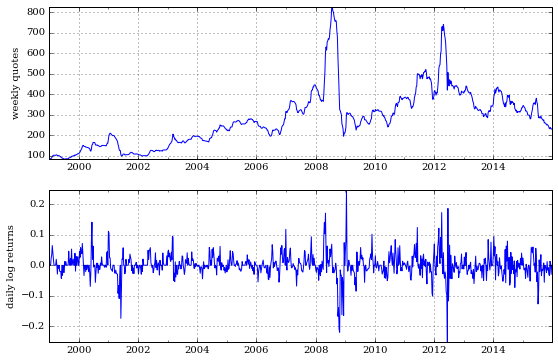

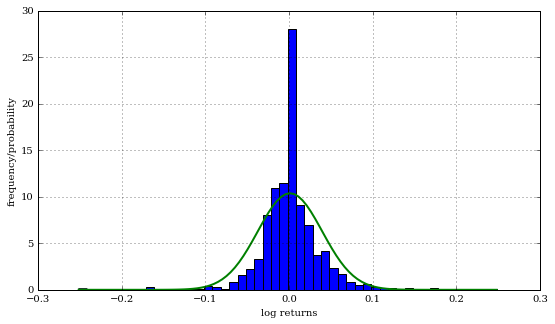

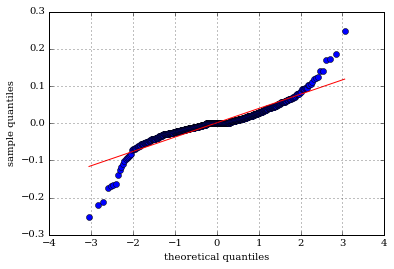

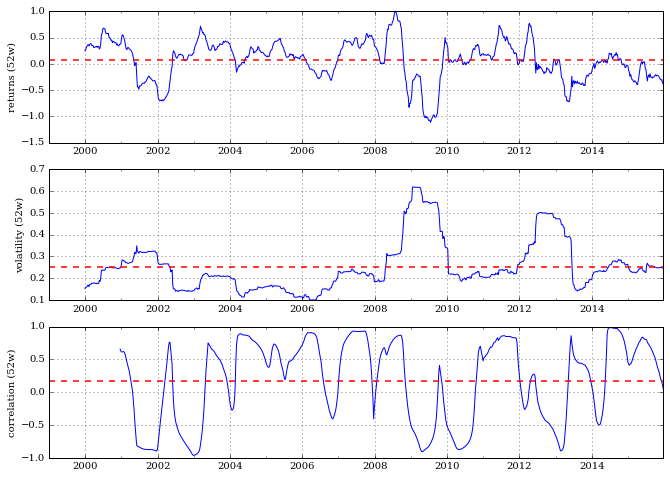

In [57]:
import math
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

data = pd.read_csv("C:/Users/msteinme/Documents/rsi.csv")
data1 = data[['date','Close']][25:913]
windowString = input('Enter window: ')
window = int(windowString)

#change to correct date index
data1['date'] = pd.to_datetime(data1['date'])
date = data1['date']
data1.index = data1['date'].values
data1 = data1.drop(['date'],axis=1)

#converting closing prices to returns
close = data1['Close']
rets = close/close.shift(1)-1
data1['Returns'] = rets
data1 = data1[1:]

#converting to close price to log returns
data1['Log_Returns'] = np.log(close/close.shift(1))

# daily quotes and log returns
def quotes_returns(data1):
    plt.figure(figsize=(9, 6))
    plt.subplot(211)
    data1['Close'].plot()
    plt.ylabel('weekly quotes')
    plt.grid(True)
    plt.axis('tight')
    plt.subplot(212)
    data1['Log_Returns'].plot()
    plt.ylabel('daily log returns')
    plt.grid(True)
    plt.axis('tight')
    plt.show()

#Probability density function of a normal random variable x.
def dN(x, mu, sigma):
    z = (x - mu) / sigma
    pdf = np.exp(-0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf

# histogram of annualized daily log returns
def return_histogram(data1):
    plt.figure(figsize=(9, 5))
    x = np.linspace(min(data1['Log_Returns']), max(data1['Log_Returns']), 100)
    plt.hist(np.array(data1['Log_Returns']), bins=50, normed=True)
    y = dN(x, np.mean(data1['Log_Returns']), np.std(data1['Log_Returns']))
    plt.plot(x, y, linewidth=2)
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    plt.grid(True)

# Q-Q plot of annualized daily log returns
def return_qqplot(data1):
    plt.figure(figsize=(9, 5))
    sm.qqplot(data1['Log_Returns'], line='s')
    plt.grid(True)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')

#Calculates and plots rolling statistics (mean, std, correlation)
def rolling_statistics(data1):
    plt.figure(figsize=(11, 8))
    plt.subplot(311)
    mr = data1['Log_Returns'].rolling(center=False, window=window).mean() * window
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns ('+windowString+'w)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)
    
    plt.subplot(312)
    vo = data1['Log_Returns'].rolling(window=window,center=False).std() * math.sqrt(window)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility ('+windowString+'w)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()
    
    plt.subplot(313)
    co = mr.rolling(window=window).corr(other=vo)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation ('+windowString+'w)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)

quotes_returns(data1)
return_histogram(data1)
return_qqplot(data1)
rolling_statistics(data1)